In [1]:
from pathlib import Path as path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
imgpth = path(os.listdir()[0])/'VOCdevkit/VOC2007/JPEGImages'
p_json = path(os.listdir()[0])/'VOCdevkit/PASCAL_VOC'

with open(str(p_json)+'/'+os.listdir(str(p_json))[4], 'r') as jfile:
    trn = json.load(jfile)

In [24]:
print('They are {} classes in the the pascal 2007 dataset'.format(len(trn['categories'])))
print()
categ = {i['id']: i['name'] for i in trn['categories']}
#list(categ.values())

They are 20 classes in the the pascal 2007 dataset



In [8]:
print("They are {} images in this training set ".format(len(trn['images'])))
trn_nm = {i['id']:i['file_name'] for i in trn['images']} ### A dictionary of filenames with the id as key

They are 2501 images in this training set 


In [9]:
trn['annotations'][0]

{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
 'area': 34104,
 'iscrowd': 0,
 'image_id': 12,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0}

In [10]:
#len(trn['annotations'])
def hw_bb(bb): 
    return np.array([bb[1],bb[0],bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_an = collections.defaultdict(lambda:[])
for i in trn['annotations']:
    if not i['ignore']:
        bb = i['bbox']
        bb = hw_bb(bb)
        trn_an[i["image_id"]].append((bb,i['category_id']))
del i, bb
len(trn_an)

2501

Dictionaries

    +trn_nm-  A dictionary of filenames with the id as key
    +trn_an- dictionary of annotations with keys as image id
    +categ - Dictionary of category name with the keys as a category_id with 

In [25]:
t_img = trn['images'][0]
t_ann=trn_an[t_img['id']][0]; t_ann ###(hw bounding box and category id )
t_img, t_ann

({'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 (array([ 96, 155, 269, 350]), 7))

In [27]:
categ[t_ann[1]]

'car'

In [28]:
def bb_hw(a):
    return np.array([a[1], a[0], a[3]-a[1]+1, a[2]-a[0]+1 ])

In [30]:
hw_bb(t_ann[0])

array([155,  96, 504, 364])

In [15]:
t_img['file_name']

'000012.jpg'

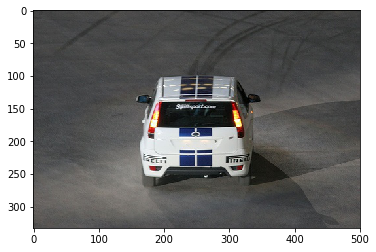

In [16]:
img = plt.imread(str(imgpth)+'/'+t_img['file_name'])
plt.imshow(img)
plt.show()

In [46]:
def show_img(img, figsize=None, ax=None):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [89]:

### Outline
def outline(ax, lw):
    """
    Outline the passed object with a black border
    """
    ax.set_path_effects([patheffects.Stroke(linewidth =lw , foreground = 'black'), patheffects.Normal()])
###Outline
def draw_bb(ax, b):
    """
    Draws a bounding box around the object 
    """
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor = 'white', lw = 2))
    outline(patch, 4)
def write_txt(ax, xy, txt, sz = 14):
    """
    writes text on  th image
    """
    text = ax.text(xy[0], xy[1], txt, verticalalignment = 'top', color = 'white',fontsize = 20, weight = 'bold')
    outline(text, 1)

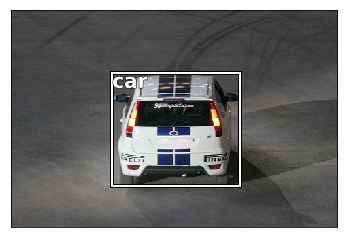

In [91]:
img = plt.imread(str(imgpth)+'/'+t_img['file_name'])
a = show_img(img)
b = bb_hw(t_ann[0])
draw_bb(a, b)
write_txt(a, b[:2], categ[t_ann[1]])